# Iris Flowers Classification 

## Problem Statement :-

Predict the different species of flowers on
 the length of there petals and sepals
 only Jupyter notebook code

In [2]:
# Import the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Import the data 

df = pd.read_csv("data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
df_corr = df.corr()
df_corr

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [10]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

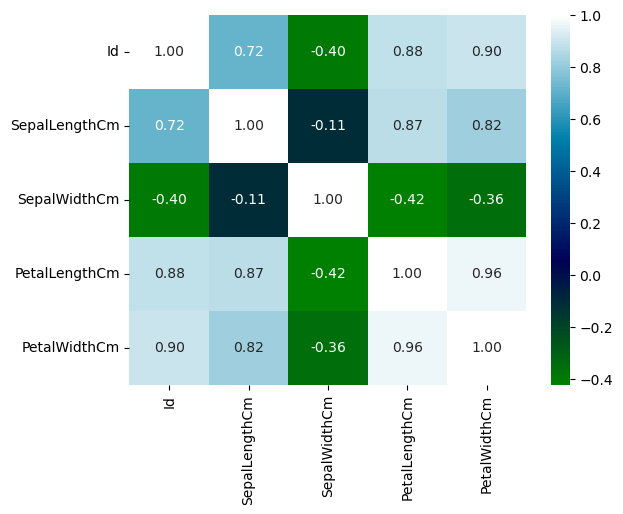

In [11]:
# Plot the correlation of the above in heatmap

import seaborn as sns

sns.heatmap(df_corr, fmt = ".2f", annot= True, cmap = "ocean");

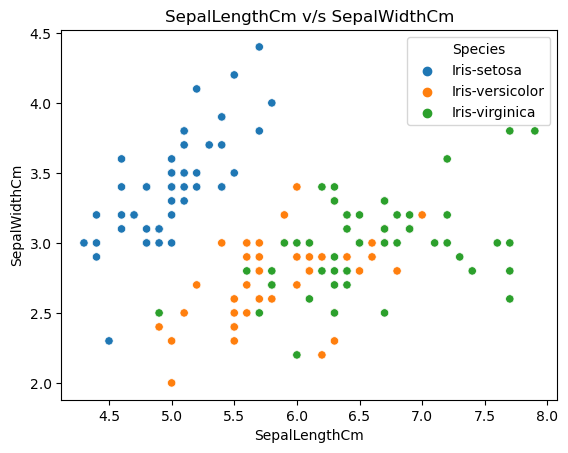

In [12]:
# Scatter Plots of   SepalLengthCm v/s SepalWidthCm

sns.scatterplot( x= "SepalLengthCm" , y = "SepalWidthCm", data = df, hue = "Species")

plt.title("SepalLengthCm v/s SepalWidthCm")

plt.show();

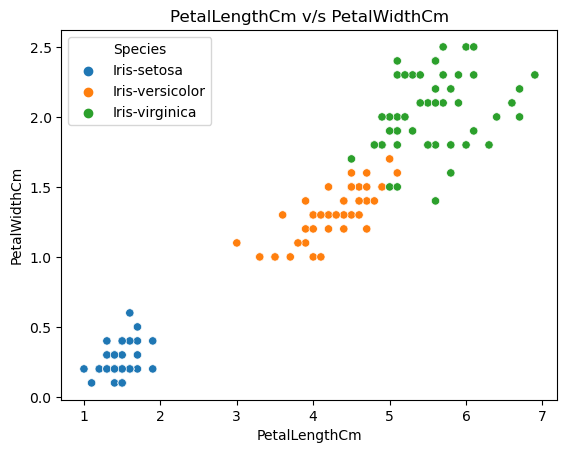

In [13]:
# Scatter Plots of   PetalLengthCm v/s PetalWidthCm

sns.scatterplot( x= "PetalLengthCm" , y = "PetalWidthCm", data = df, hue = "Species")

plt.title("PetalLengthCm v/s PetalWidthCm")

plt.show();

## Modeling 

In [14]:
# Importing the Random Forest Classifier Model

from sklearn.ensemble import RandomForestClassifier

# Make the data
from sklearn.model_selection import train_test_split
x = df.drop("Species", axis =1)
y = df["Species"]

np.random.seed(42)

# Split the data

x_train , x_test, y_train , y_test = train_test_split(x,
                                                     y,
                                                     test_size=0.2)

# Training the data

rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)

# Checking the score on test datasets

rfc.score(x_test,y_test)


1.0

In [15]:
y_pred = rfc.predict(x_test)

In [16]:
# Calulating accuracy of the Model

from sklearn.metrics import accuracy_score

acc= accuracy_score(y_test,y_pred)


In [17]:
print(f"Accuracy of the Random Forest Classifier is {acc*100:.2f}%")

Accuracy of the Random Forest Classifier is 100.00%
